<h1>Proof of Case & Use pyMagicStat-Alpha V 0.02</h1>

In [6]:
# Configuración inicial para cargar el proyecto y limpiar la caché
import sys
import os
from importlib import reload
import shutil
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Ruta al directorio raíz del proyecto
PROJECT_ROOT = r'C:\Users\ehudb\OneDrive\Desktop\Modulo_inferencial'

# Asegurarse de que el proyecto está en sys.path
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Ruta al directorio pyMagicStat
PYMAGICSTAT_PATH = os.path.join(PROJECT_ROOT, 'pyMagicStat')

# Limpiar caché de módulos
def clean_pycache():
    pycache_path = os.path.join(PYMAGICSTAT_PATH, '__pycache__')
    if os.path.exists(pycache_path):
        shutil.rmtree(pycache_path)
        print(f"Eliminado caché en: {pycache_path}")
    else:
        print("No se encontró caché para limpiar.")

clean_pycache()

# Limpiar módulos cargados previamente
MODULES_TO_CLEAR = [
    "pyMagicStat.distributions",
    "pyMagicStat.confidence_intervals",
    "pyMagicStat.utils",
    "pyMagicStat.distributionOrchestrator",
]
for module in MODULES_TO_CLEAR:
    if module in sys.modules:
        del sys.modules[module]

# Importar módulos principales
import pyMagicStat.confidence_intervals as ci
import pyMagicStat.distributions as dist
import pyMagicStat.utils as utils


# Recargar módulos para reflejar cambios
reload(ci)
reload(dist)
reload(utils)


# Importar clases específicas necesarias
from pyMagicStat.confidence_intervals import (
    ConfidenceIntervals,
    NormalDistConfidenceIntervals,
    PopulationMeanCI,
    PopulationProportionCI,
    PopulationVarianceCI,
    BootstrapConfidenceIntervals,
    BootstrapMeanCI,
    BootstrapMedianCI,
    BootstrapVarianceCI,
    BootstrapProportionCI,
)
from pyMagicStat.distributions import (
    Distribution,
    DistributionTest,
    NormalDistribution,
    BinomialDistribution,
    PoissonDistribution,
    LognormalDistribution,
    GoodnessAndFit
)
from pyMagicStat.utils import output_format, validate_non_nan
 

# Validación del entorno
print("Módulos pyMagicStat cargados y listos para usar.")


No se encontró caché para limpiar.
Módulos pyMagicStat cargados y listos para usar.


In [7]:
print(Distribution.__module__)

pyMagicStat.distributions


In [8]:


def normal_ci_mean(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = np.std(data, ddof=1) / np.sqrt(n)
    margin = stderr * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - margin, mean + margin

def bootstrap_ci(data, func=np.mean, confidence=0.95, n_bootstraps=1000):
    bootstraps = np.random.choice(data, (n_bootstraps, len(data)), replace=True)
    stat = np.array([func(sample) for sample in bootstraps])
    lower = np.percentile(stat, (1-confidence)/2*100)
    upper = np.percentile(stat, (1+confidence)/2*100)
    return lower, upper

def audit_precision(data, n_bootstraps=1000, confidence=0.95):
    results = {
        'mean': {'normal': {}, 'bootstrap': {}},
        'variance': {'normal': {}, 'bootstrap': {}},
        'proportion': {'normal': {}, 'bootstrap': {}},
        'median': {'normal': {}, 'bootstrap': {}}
    }
    
    # Media
    results['mean']['normal']['ci'] = normal_ci_mean(data, confidence)
    results['mean']['bootstrap']['ci'] = bootstrap_ci(data, np.mean, confidence, n_bootstraps)
    results['mean']['actual'] = np.mean(data)
    
    # Varianza
    variance_normal = np.var(data, ddof=1)
    ci_variance = (variance_normal - 1.96*np.sqrt(2*variance_normal**2/(len(data)-1)),
                   variance_normal + 1.96*np.sqrt(2*variance_normal**2/(len(data)-1)))
    results['variance']['normal']['ci'] = ci_variance
    results['variance']['bootstrap']['ci'] = bootstrap_ci(data, np.var, confidence, n_bootstraps)
    results['variance']['actual'] = variance_normal
    
    # Proporción Poblacional
    prop = np.mean(data > 0)
    n = len(data)
    se_prop = np.sqrt(prop * (1 - prop) / n)
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    ci_prop = (prop - z_score * se_prop, prop + z_score * se_prop)
    results['proportion']['normal']['ci'] = ci_prop
    results['proportion']['bootstrap']['ci'] = bootstrap_ci(data, lambda x: np.mean(x > 0), confidence, n_bootstraps)
    results['proportion']['actual'] = prop
    
    # Mediana
    results['median']['normal']['ci'] = (np.median(data) - 1.96 * np.std(data) / np.sqrt(len(data)),
                                         np.median(data) + 1.96 * np.std(data) / np.sqrt(len(data)))
    results['median']['bootstrap']['ci'] = bootstrap_ci(data, np.median, confidence, n_bootstraps)
    results['median']['actual'] = np.median(data)
    
    return results

# Generación de datos para diferentes distribuciones




In [9]:
# Lognormal sin aproximación a normal
print("lognormal_no_normal")


lognormal_no_normal = Distribution(np.random.lognormal(mean=0, sigma=1, size=5000))
lognormal_no_normal_results = audit_precision(lognormal_no_normal.data)

r = GoodnessAndFit(lognormal_no_normal)
r.evaluate_fit()
print(lognormal_no_normal.type)
print(lognormal_no_normal.aic_table)

print("\n-------------------------------------------\n")


print("Lognormal con aproximación a normal:")
# Lognormal con aproximación a normal
lognormal_normal_approx = Distribution(np.random.lognormal(mean=0, sigma=0.1, size=5000))
lognormal_normal_approx_results = audit_precision(lognormal_normal_approx.data)
print(lognormal_normal_approx_results)
x = GoodnessAndFit(lognormal_normal_approx)
x.evaluate_fit()
print(lognormal_normal_approx.type)
print(lognormal_normal_approx.aic_table)
print("\n-------------------------------------------\n")

lognormal_no_normal


c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\pyMagicStat\distributions.py:508: UserWarning: No valid distributions were found after applying goodness of fit tests.
  warnings.warn("No valid distributions were found after applying goodness of fit tests.", UserWarning)


{}
{}

-------------------------------------------

Lognormal con aproximación a normal:
{'mean': {'normal': {'ci': (np.float64(0.9976957620102481), np.float64(1.0031656357344854))}, 'bootstrap': {'ci': (np.float64(0.997649855246157), np.float64(1.0032909638429355))}, 'actual': np.float64(1.0004306988723668)}, 'variance': {'normal': {'ci': (np.float64(0.009349520228660563), np.float64(0.010112508039363498))}, 'bootstrap': {'ci': (np.float64(0.009346103368797546), np.float64(0.010123466645972742))}, 'actual': np.float64(0.00973101413401203)}, 'proportion': {'normal': {'ci': (np.float64(1.0), np.float64(1.0))}, 'bootstrap': {'ci': (np.float64(1.0), np.float64(1.0))}, 'actual': np.float64(1.0)}, 'median': {'normal': {'ci': (np.float64(0.9949503955091239), np.float64(1.0004184984609301))}, 'bootstrap': {'ci': (np.float64(0.9935273841630555), np.float64(1.0001697659353155))}, 'actual': np.float64(0.997684446985027)}}
{}
{}

-------------------------------------------



<h3>Lognormal hay que solucionar la falta de presicion en la aproximacion a la normal.</h3>

In [19]:
def binomial_data_test(binomial_instance):
    # Extraemos los parámetros de la instancia
    n = binomial_instance.n
    p = binomial_instance.p

    media_teorica = n * p
    varianza_teorica = n * p * (1 - p)

    # Parámetros empíricos calculados a partir de los datos
    data = binomial_instance.data
    media_empirica = np.mean(data)
    varianza_empirica = np.var(data)

    print(f"n estimado: {n}, p estimado: {p:.4f}")
    print(f"Media teórica: {media_teorica}, Media empírica: {media_empirica}")
    print(f"Varianza teórica: {varianza_teorica}, Varianza empírica: {varianza_empirica}")

print("Binomial sin aproximación a normal:")
# Binomial sin aproximación a normal
#Iniciate de Distribution object 
binomial_no_normal = Distribution(np.random.binomial(n=5, p=0.5, size=5000))
# Distribution.data is where we store de dataframe
print(binomial_no_normal.data)

print("Type de self.data:", type(binomial_no_normal.data))
print("Type de elementos en self.data:", binomial_no_normal.data.dtype)
#binomial_no_normal_results = audit_precision(binomial_no_normal.data)
#print(binomial_no_normal_results)

#inicialice Distribution as Binomial_distribution object 
z = BinomialDistribution(binomial_no_normal)

# evaluate if the class instance is adjust to the particular distribution and return True|False and store the output on the Distribution.tipo(hay que cambiar a type)
print(z.fit_test())

# evaluate if the object is from the specify distribution and if it has a normal approximation
print(z.normal_approximation())

#return the distribution type detail ..
print(z.type)
print(f'binomial data quality {binomial_data_test(z)}')
print("\n-------------------------------------------\n")


print("Binomial con aproximación a normal:")
# Binomial con aproximación a normal
binomial_normal_approx = Distribution(np.random.binomial(n=10, p=0.5, size=5000))
#binomial_normal_approx_results = audit_precision(binomial_normal_approx.data)
#print(binomial_normal_approx_results)
r = BinomialDistribution(binomial_normal_approx)
print(r.fit_test())
print(r.normal_approximation())
print(r.type)
print(f'binomial data quality {binomial_data_test(r)}')
print("\n-------------------------------------------\n")



Binomial sin aproximación a normal:
[1 2 3 ... 2 3 3]
Type de self.data: <class 'numpy.ndarray'>
Type de elementos en self.data: int32
{'p_value': np.float64(0.13869545062835353), 'Result': np.True_, 'txt': 'Likelihod ratio test: chi2 5.50, p = 0.1387'}
{'Result': np.False_, 'txt': 'Cannot be treated as normal'}
{'Binomial': {'Result': np.False_, 'Normal_approx': np.False_}}
n estimado: 5, p estimado: 0.4944
Media teórica: 2.4718, Media empírica: 2.4718
Varianza teórica: 1.249840952, Varianza empírica: 1.2192047600000002
binomial data quality None

-------------------------------------------

Binomial con aproximación a normal:
{'p_value': np.float64(0.7175238301685074), 'Result': np.True_, 'txt': 'Likelihod ratio test: chi2 4.53, p = 0.7175'}
{'Result': np.False_, 'txt': 'Cannot be treated as normal'}
{'Binomial': {'Result': np.False_, 'Normal_approx': np.False_}}
n estimado: 10, p estimado: 0.5023
Media teórica: 5.0228, Media empírica: 5.0228
Varianza teórica: 2.499948016, Varianza e

In [17]:
z.type

{'Binomial': {'Result': np.False_, 'Normal_approx': np.False_}}

In [11]:
a = Distribution(np.random.binomial(n=100, p=0.5, size=5000))
b = GoodnessAndFit(a)
b.evaluate_fit()
print(a.type)
print(a.aic_table)
print(PoissonDistribution(a).fit_test())
print(BinomialDistribution(a).fit_test())


{}
{}


TypeError: Error in PoissonDistribution fit_test: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.008958922156919414

<h1>Esta Salida solo debe mostrar pruebas positivas de distribucion</h1>

generar una funcion con el bloque anterior para que valide cada una de las instancias de binomial y se cierra ese modulo

<H3>Poisson Distribution</H3>

In [ ]:
# Poisson sin aproximación a normal
poisson_no_normal = np.random.poisson(lam=2, size=5000)
poisson_no_normal_results = audit_precision(poisson_no_normal)
print("Poisson sin aproximación a normal:")
print(poisson_no_normal_results)

# Poisson con aproximación a normal
poisson_normal_approx = np.random.poisson(lam=30, size=5000)
poisson_normal_approx_results = audit_precision(poisson_normal_approx)

print("Poisson con aproximación a normal:")
print(poisson_normal_approx_results)

Poisson sin aproximación a normal:
{'mean': {'normal': {'ci': (np.float64(1.9438038666586483), np.float64(2.022196133341352))}, 'bootstrap': {'ci': (np.float64(1.9445750000000002), np.float64(2.024005))}, 'actual': np.float64(1.983)}, 'variance': {'normal': {'ci': (np.float64(1.9203534449346642), np.float64(2.0770680393621954))}, 'bootstrap': {'ci': (np.float64(1.9097679150000002), np.float64(2.0954675490000003))}, 'actual': np.float64(1.9987107421484298)}, 'proportion': {'normal': {'ci': (np.float64(0.8507937032396683), np.float64(0.8700062967603318))}, 'bootstrap': {'ci': (np.float64(0.8506), np.float64(0.8696))}, 'actual': np.float64(0.8604)}, 'median': {'normal': {'ci': (np.float64(1.9608165556960595), np.float64(2.0391834443039403))}, 'bootstrap': {'ci': (np.float64(2.0), np.float64(2.0))}, 'actual': np.float64(2.0)}}
Poisson con aproximación a normal:
{'mean': {'normal': {'ci': (np.float64(29.88275510032399), np.float64(30.19044489967601))}, 'bootstrap': {'ci': (np.float64(29.881

<h3>Poisson trabajar approx a normalidad </h3>

In [ ]:
# Generar datos de prueba
data_normal = np.random.normal(loc=0, scale=1, size=1000)
data_binomial = np.random.binomial(n=10, p=0.5, size=1000)
data_poisson = np.random.poisson(lam=5, size=1000)
data_lognormal = np.random.lognormal(mean=0, sigma=1, size=1000)


In [ ]:
# Crear instancias de las distribuciones con los datos generados
normal_dist = NormalDistribution(data_normal)
binomial_dist = BinomialDistribution(NormalDistribution(data_binomial), n=10, p=0.5)
poisson_dist = PoissonDistribution(NormalDistribution(data_poisson))
lognormal_dist = LognormalDistribution(NormalDistribution(data_lognormal))

# Realizar las pruebas
print("Normal Distribution Fit Test:")
print(normal_dist.fit_test())
print("")

print("Binomial Distribution Fit Test:")
print(binomial_dist.fit_test())
print("Binomial Normal Approximation:")
print(binomial_dist.normal_approximation())
print("")

print("Poisson Distribution Fit Test:")
print(poisson_dist.fit_test())
print("Poisson Normal Approximation:")
print(poisson_dist.normal_approximation())
print("")

print("Lognormal Distribution Fit Test:")
print(lognormal_dist.fit_test())
print("Lognormal Normal Approximation:")
print(lognormal_dist.normal_approximation())


Normal Distribution Fit Test:
{'Shapiro': {'p_value': np.float64(0.41376800148402926), 'bool_result': True, 'txt': 'Shapiro test'}, 'Anderson-Darling': {'p_value': np.float64(0.05), 'bool_result': True, 'txt': 'Anderson-Darling test'}, 'D’Agostino-Pearson': {'p_value': np.float64(0.3001433928929959), 'bool_result': True, 'txt': 'D’Agostino-Pearson test'}, 'bool_result': True}

Binomial Distribution Fit Test:
{'Result': True, 'txt': 'Binomial fit test'}
Binomial Normal Approximation:
{'Result': True, 'txt': 'Can be treated as normal'}

Poisson Distribution Fit Test:
{'Result': True, 'txt': 'Poisson Distribution True'}
Poisson Normal Approximation:
{'Result': True, 'txt': 'Can be treated as normal'}

Lognormal Distribution Fit Test:
{'Result': True, 'txt': 'Lognormal Distribution True'}
Lognormal Normal Approximation:
{'Result': True, 'txt': 'Can be treated as normal'}


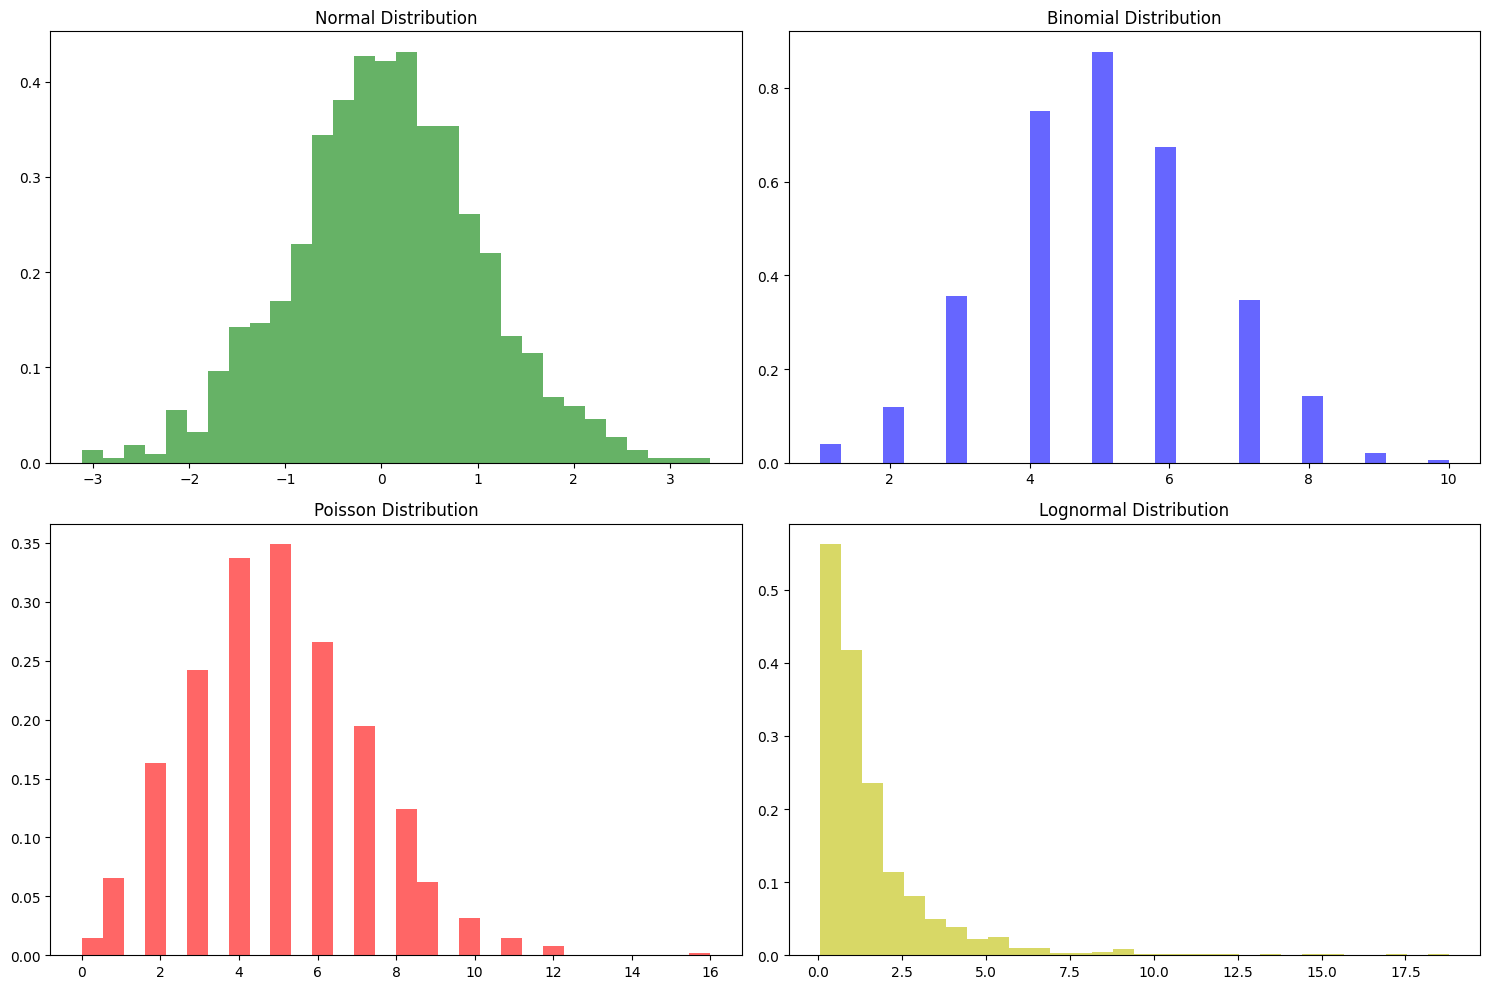

In [ ]:
# Visualizar las distribuciones generadas
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(data_normal, bins=30, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution')

plt.subplot(2, 2, 2)
plt.hist(data_binomial, bins=30, density=True, alpha=0.6, color='b')
plt.title('Binomial Distribution')

plt.subplot(2, 2, 3)
plt.hist(data_poisson, bins=30, density=True, alpha=0.6, color='r')
plt.title('Poisson Distribution')

plt.subplot(2, 2, 4)
plt.hist(data_lognormal, bins=30, density=True, alpha=0.6, color='y')
plt.title('Lognormal Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Generar datos de prueba
data_normal = Distribution(np.random.normal(loc=0, scale=1, size=1000))
data_binomial = Distribution(np.random.binomial(n=10, p=0.5, size=1000))
data_poisson = Distribution(np.random.poisson(lam=5, size=1000))
data_lognormal = Distribution(np.random.lognormal(mean=0, sigma=1, size=1000))
# Crear instancias de GoodnessAndFit con los datos generados
goodness_normal = GoodnessAndFit(data_normal)
goodness_binomial = GoodnessAndFit(data_binomial)
goodness_poisson = GoodnessAndFit(data_poisson)
goodness_lognormal = GoodnessAndFit(data_lognormal)

# Realizar las pruebas
print("GoodnessOfFit Normal Distribution:")
print(goodness_normal.evaluate_fit())
print(data_normal.type)
print(data_normal.aic_table)
print("")

print("GoodnessOfFit Binomial Distribution:")
print(goodness_binomial.evaluate_fit())
print(data_binomial.type)
print(data_binomial.aic_table)
print("")

print("GoodnessOfFit Poisson Distribution:")
print(goodness_poisson.evaluate_fit())
print(data_lognormal.type)
print(data_binomial.aic_table)
print("")

print("GoodnessOfFit Lognormal Distribution:")
print(goodness_lognormal.evaluate_fit())
print(data_lognormal.type)
print(data_binomial.aic_table)
print("")


GoodnessOfFit Normal Distribution:
Error in Binomial distribution: All values in data must be non-negative integers
Selected Distribution Normal
{'Shapiro': {'p_value': np.float64(0.9945334116617671), 'bool_result': True, 'txt': 'Shapiro test'}, 'Anderson-Darling': {'p_value': np.float64(0.05), 'bool_result': True, 'txt': 'Anderson-Darling test'}, 'D’Agostino-Pearson': {'p_value': np.float64(0.9779325482546335), 'bool_result': True, 'txt': 'D’Agostino-Pearson test'}, 'bool_result': True, 'Normal Approximation': {'bool_result': True, 'txt': 'Can be treated as normal'}}
{'Normal': {'Normal_approx': None}}
{'Normal': np.float64(1000930.2138150607), 'Poisson': np.float64(nan), 'Lognormal': np.float64(nan)}

GoodnessOfFit Binomial Distribution:
Selected Distribution Poisson
{'Result': True, 'txt': 'Poisson Distribution True', 'Normal Approximation': {'Result': True, 'txt': 'Can be treated as normal'}}
{'Poisson': {'Normal_approx': None}}
{'Normal': np.float64(1001803.5598506798), 'Binomial'

c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\pyMagicStat\distributions.py:194: RuntimeWarning: invalid value encountered in log
  log_likelihood = np.sum(self.data * np.log(self.lam) - self.lam - log_factorial)
c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\pyMagicStat\distributions.py:205: RuntimeWarning: invalid value encountered in log
  self.meanlog = np.mean(np.log(self.data))
c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\pyMagicStat\distributions.py:206: RuntimeWarning: invalid value encountered in log
  self.sdlog = np.std(np.log(self.data))
c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\pyMagicStat\distributions.py:230: RuntimeWarning: invalid value encountered in log
  1 / self.sdlog ** 2 * np.sum((np.log(self.data) - self.meanlog)**2))
c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\pyMagicStat\distributions.py:205: RuntimeWarning: divide by zero encountered in log
  self.meanlog = np.mean(np.log(self.data))
c:\Users\ehudb\OneDrive\Desktop\moduloInferencial\p

TypeError: object of type 'Distribution' has no len()

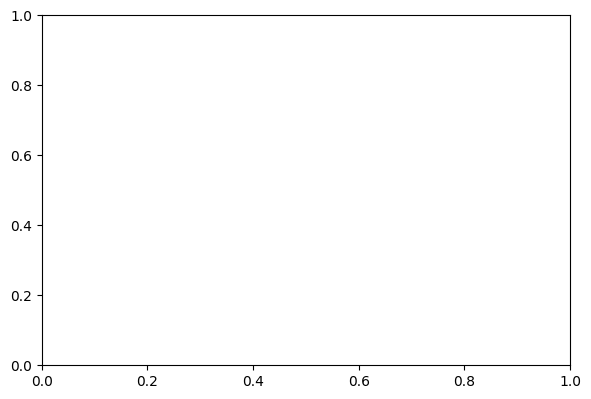

In [ ]:
# Visualizar las distribuciones generadas
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(data_normal, bins=30, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution')

plt.subplot(2, 2, 2)
plt.hist(data_binomial, bins=30, density=True, alpha=0.6, color='b')
plt.title('Binomial Distribution')

plt.subplot(2, 2, 3)
plt.hist(data_poisson, bins=30, density=True, alpha=0.6, color='r')
plt.title('Poisson Distribution')

plt.subplot(2, 2, 4)
plt.hist(data_lognormal, bins=30, density=True, alpha=0.6, color='y')
plt.title('Lognormal Distribution')

plt.tight_layout()
plt.show()
